# 1. Introduction
##  1.1 Objective 
The main of this project is use <b>Market Basket Analysis</b> to understand customer purchasing behaviour so as improve customer experience whilst improve sales. With transaction data collected on items purchased we aim to understand which items leads to the purchase of other items in other to provide better product recommedation , better product arrangement in malls and  online website to ease the stress of buy hence improving customers satisfaction.

## 1.2 Business Problem
 - Which products are commonly purchased together?

In [42]:
import os
import numpy as np 
import pandas as pd 
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
import igraph as ig
from plotly.graph_objs import *
from plotly.subplots import make_subplots


C:\Users\Richard\anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:287: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:287: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:287: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:287: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [43]:
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))
# Change the current working directory
os.chdir('C:\\Users\\Richard\\Downloads\\Data')
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Richard\Downloads\Data
Current working directory: C:\Users\Richard\Downloads\Data


## 2. Prepare & Process

The cleaned dataset was downloaded from kaggle

In [44]:
#reading my Groceries Dataset
df = pd.read_csv("Groceries data.csv")
x  = pd.read_csv("basket.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [46]:
#changing the data format for my columns
df["Date"] = pd.to_datetime(df['Date'])
#df[['Member_number','year','month','day','day_of_week']] = df[['Member_number','year','month','day','day_of_week']].astype(str)


In [47]:
#checking how many transaction we have in our dataset
len(df)

38765

## 3. Analyze

### 3.1 Exploratory Data Analysis (EDA)

In [48]:
#showing the Top 20 most bought item for the combine year 2014 and 2015
freq_item = df['itemDescription'].value_counts().head(20)

#plot the top 20 most frequent item
fig = px.bar(data_frame=freq_item, title = 'Top 20 sold Items (2014-2015)', color = freq_item,
            labels = {'index':'Item',
                      'value':'Quantity'})
fig.update_layout(title_x=0.5, title_y=0.87)
fig

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



The above bar chart shows the products with the most sales, with <i><b>whole milk, other vegetables, rolls/buns, soda and yougurt</b></i> being their <b>top 5 selling products</b>.

In [49]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [50]:
# creating a new dataframe by filtering out by years
df14 = df[df['year'] == 2014]
df15 = df[df['year'] == 2015]

In [51]:
#finding the total number of quantity sold per month and arranging the data according to the index
total_items = df['month'].value_counts().sort_index()

#converting the total_items into a dataframe
total_items_months = pd.DataFrame(total_items)

#creating a month list arranged in monthly order
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

#adding the months list into the dataframe
total_items_months['months'] = months

#renaming the columns name
total_items_months.rename(columns={'month':'quantity'})

total_items_months

#Plotting the line graph to show the quantity of items sold per month
px.line(data_frame = total_items_months,x='months',y='month', title = "Total Qunatity Sold Per Month (2014-2015)",
       labels = {'month':'Quantity',
                'months':'Months'}).update_layout(title_x=0.50,title_y=0.86).update_yaxes(range=[2000,4000])

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Looking at the total trend of total quantities of item sold per month(2014-2015).The major trend shows a <b> increase in sales </b> from <b>Feburary to August</b>.<p></p>


A deeper look in to the trend line to discover any insights by breaking it down into previous years

In [52]:
#finding the total number of quantity sold per month and arranging the data according to the index
total_items14 = df14['month'].value_counts().sort_index()

#converting the total_items into a dataframe
total_items_months14 = pd.DataFrame(total_items14)

#creating a month list arranged in monthly order
months14 = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')

#adding the months list into the dataframe
total_items_months14['months'] = months

#renaming the columns name
total_items_months14.rename(columns={'month':'quantity'})

total_items_months14




,month,months
1,1504,Jan
2,1547,Feb
3,1491,Mar
4,1506,Apr
5,1625,May
6,1525,Jun
7,1623,Jul
8,1535,Aug
9,1350,Sep
10,1555,Oct


The above table shows the total quantity of products sold per month for the year 2014

In [53]:
#finding the total number of quantity sold per month and arranging the data according to the index
total_items15 = df15['month'].value_counts().sort_index()

#converting the total_items into a dataframe
total_items_months15 = pd.DataFrame(total_items15)

#creating a month list arranged in monthly order
months15 = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')

#adding the months list into the dataframe
total_items_months15['months'] = months

#renaming the columns name
total_items_months15.rename(columns={'month':'quantity'})

total_items_months15




,month,months
1,1829,Jan
2,1485,Feb
3,1792,Mar
4,1666,Apr
5,1710,May
6,1791,Jun
7,1645,Jul
8,1963,Aug
9,1613,Sep
10,1663,Oct


The above table shows the total quantity of products sold per month for the year 2015

In [54]:
#plotting our two graphs for the year 2014 and 2015
a=go.Scatter(x = total_items_months14['months'], y = total_items_months14['month'], name = "2014")
b=go.Scatter(x = total_items_months15['months'], y = total_items_months15['month'], name = "2015")

In [55]:
#Creating a fig with subplots so a align the multiple chart side y side
fig = make_subplots(rows=1,cols=2,shared_xaxes='all',shared_yaxes='all',y_title='Quantity Purchased')

#adding the first chart to the location in the fig
fig.add_trace(a,row=1,col=1)

#adding the second chart to the location in the fig
fig.add_trace(b,row=1,col=2)

#changing the size  editing of chart
fig.update_layout(height=600, width=1000, title='Monthly Changes in Quantity Purchased Per Month',title_x=0.5,title_y=0.90)

#changing the axis ticks
#fig.update_xaxes(range = np.arange())
fig.update_yaxes(range = [0,3000])
fig.show()

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



The insight derived from the breakdown of items purchsed per month aligned with the combined years as there appears to be increase in <b>sales</b> from <b>March to August</b>.

In [56]:
#getting the most sold items from the dataframe
freq_item = [df['itemDescription'].value_counts().head(20)]

In [57]:
freq_item 

[whole milk            2502
 other vegetables      1898
 rolls/buns            1716
 soda                  1514
 yogurt                1334
 root vegetables       1071
 tropical fruit        1032
 bottled water          933
 sausage                924
 citrus fruit           812
 pastry                 785
 pip fruit              744
 shopping bags          731
 canned beer            717
 bottled beer           687
 whipped/sour cream     662
 newspapers             596
 frankfurter            580
 brown bread            571
 pork                   566
 Name: itemDescription, dtype: int64]

## The Top 5 most sold items from the retail stores are:<p></p>
<li>Whole Milk</li>
<li>Other Vegetables</li>
<li>Rolls/Buns</li>
<li>Soda</li>
<li>Yogurt</li>

Since these are the most purchased items from the retails understanding the consequent items of this sold produts will improve sales and customer statisfaction.<p></p>

#### Lets take a dive inside the data using Market Basket Analysis to understand customers purchasing behaviour

### 3.2 Creating a list of list 
From the df dataframe we create a bsk daframe which shows the list of item purchased  in a single transcation i.e The list on items an individual bought in a single transaction 

In [58]:
#duplicating my dataframe
bsk = df

#adding coma to the end value in my itemdescription: so when coming the item based on an individual on a single transaction they are separated by coma
bsk['itemDescription'] = bsk['itemDescription'].apply(lambda x : x+',')
bsk

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,"tropical fruit,",2015,7,21,1
1,2552,2015-05-01,"whole milk,",2015,5,1,4
2,2300,2015-09-19,"pip fruit,",2015,9,19,5
3,1187,2015-12-12,"other vegetables,",2015,12,12,5
4,3037,2015-01-02,"whole milk,",2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,"sliced cheese,",2014,8,10,6
38761,2022,2014-02-23,"candy,",2014,2,23,6
38762,1097,2014-04-16,"cake bar,",2014,4,16,2
38763,1510,2014-03-12,"fruit/vegetable juice,",2014,3,12,2


In [59]:
#grouping my dataframe by MemberId and Transactioon date.. and suming the itemdescription to concatenate the item together while setting index as false so as to avoid multi-index level
bsk=bsk.groupby(["Member_number","Date"], as_index = False)['itemDescription'].sum()

In [60]:
pd.DataFrame(bsk)

,Member_number,Date,itemDescription
0,1000,2014-06-24,"whole milk,pastry,salty snack,"
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt,"
2,1000,2015-05-27,"soda,pickled vegetables,"
3,1000,2015-07-24,"canned beer,misc. beverages,"
4,1000,2015-11-25,"sausage,hygiene articles,"
...,...,...,...
14958,4999,2015-05-16,"butter milk,whipped/sour cream,"
14959,4999,2015-12-26,"bottled water,herbs,"
14960,5000,2014-09-03,"fruit/vegetable juice,onions,"
14961,5000,2014-11-16,"bottled beer,other vegetables,"


In [61]:
#Creating a list of a list, which is the list of items bought in a single transcation
itemlist = []
for i in range(len(bsk)):
    #appending each list in the itemDescription into the itemlist variable without the last value which is the coma
    itemlist.append(str(bsk.values[i,2][:-1])) 

In [62]:
#checking the first list of item purchased in the basket dataframe
bsk.values[0,2]


'whole milk,pastry,salty snack,'

In [63]:
#cross-checking the item on the list with the item in the item list 
itemlist[0]

'whole milk,pastry,salty snack'

The (Basket) bsk list of all item purchased in a single transaction

In [64]:
pd.DataFrame(itemlist)

,0
0,"whole milk,pastry,salty snack"
1,"sausage,whole milk,semi-finished bread,yogurt"
2,"soda,pickled vegetables"
3,"canned beer,misc. beverages"
4,"sausage,hygiene articles"
...,...
14958,"butter milk,whipped/sour cream"
14959,"bottled water,herbs"
14960,"fruit/vegetable juice,onions"
14961,"bottled beer,other vegetables"


We can see the itemlist created is a pd.Series with list of items.<p></p>
We split each of the item in the itemlist into different columns the create a dataframe

In [65]:
#we split each of the item in the itemlist into different columns the create a dataframe
f = pd.Series(itemlist)
itemlist = f.apply(lambda x : pd.Series(str(x).split(',')))
itemlist

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14959,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14961,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#replacing the None value with Na 
itemlist.fillna('Na',inplace=True)

#converting each row in the itemlist dataframe into a list
itemlist = itemlist.values.tolist()


In [67]:
#assigning the variable lenght with the number of roles in the dataframe
length = len(itemlist)
length

14963

In [68]:
#excluding the Na Value from the list of item 
for i in range (length):
    itemlist[i] = [x for x in itemlist[i] if x != 'Na']


In [69]:
itemlist

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

In [70]:
#Creating an item matrix
TE = TransactionEncoder()
TE.fit(itemlist)
item_transformed = TE.transform(itemlist)
itemlist_matrix = pd.DataFrame(item_transformed,columns=TE.columns_)
itemlist_matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.3 Implementation of Market Basket Analysis Algorithm

### 3.3.1 Apriori Algorithm

In [71]:
## Apriori Algorithm to get the support value 
bsk_freq_items = apriori(itemlist_matrix, min_support=0.01,use_colnames=True,max_len=None)

#arranging the dataframe based on the support value
bsk_freq_items.sort_values(by='support',ascending=False)

,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
29,0.010559,(herbs)
45,0.010493,(red/blush wine)
44,0.010158,(processed cheese)


Support Value measures how frequent an association rule happens in a dataset

### 3.4 Association Rule

In [72]:
#Creating a dataframe with product support , confidence and Lift
mba = association_rules(bsk_freq_items, metric='confidence',min_threshold = 0)
mba

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


Since we not getting a lift ratio greater than one i.e (Lift>1), which means a strong association between items. This might be due to the fact Association rules needs to appear in hundreds of transactions to be statistically significant.



Due to this problem, based on this data we try to still understand the data

In [73]:
#re-arranging the mba dataframe based on the support
mba.sort_values(by='support', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091


In [74]:
# remove the parentheses in the antecedents and consequents columns
mba['antecedents'] = mba['antecedents'].apply(lambda a: ', '.join(list(a)))
mba['consequents'] = mba['consequents'].apply(lambda a: ', '.join(list(a)))
mba.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,other vegetables,rolls/buns,0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,rolls/buns,other vegetables,0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
2,other vegetables,whole milk,0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,whole milk,other vegetables,0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,rolls/buns,whole milk,0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986


In [75]:
px.density_heatmap(data_frame=mba,x='consequents',y='antecedents',z='lift',title='Lift of Association',color_continuous_scale =['white', 'blue', 'green']).update_layout(title_x=0.50,title_y=0.86)

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Richard\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



The green tiles shows a strong association rule between the antecedents and the consequents

In [76]:
d =  pd.DataFrame(mba['antecedents']+' '+'->'+' '+mba['consequents']).rename(columns ={0:'association'})
d['support'] = mba['support']
d

,association,support
0,other vegetables -> rolls/buns,0.010559
1,rolls/buns -> other vegetables,0.010559
2,other vegetables -> whole milk,0.014837
3,whole milk -> other vegetables,0.014837
4,rolls/buns -> whole milk,0.013968
5,whole milk -> rolls/buns,0.013968
6,soda -> whole milk,0.011629
7,whole milk -> soda,0.011629
8,yogurt -> whole milk,0.011161
9,whole milk -> yogurt,0.011161


<AxesSubplot:title={'center':'Most Frequent Association'}, xlabel='association'>

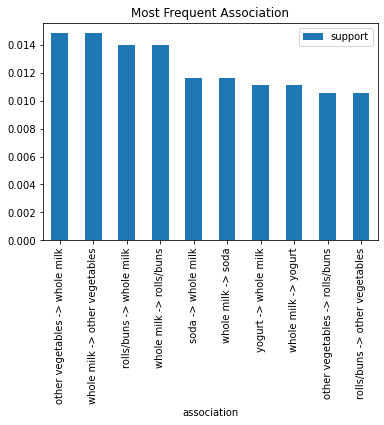

In [77]:
d.sort_values(by='support',ascending=False).plot(kind='bar',y='support',x='association',title='Most Frequent Association')

The above plot shows the most frequent association of goods. This are the most common products sold togther

## 4. Insights 

####  1. The Top 5 most sold items from the retail stores are:  

1. Whole Milk
2. Other Vegetables
3. Rolls/Buns
4. Soda
5. Yogurt

#### 2. Top 5 products sold together are: 
1. Other Vegetables and Whole Milk
2. Whole Milk and Other Vegetables
3. Rolls/Buns and Whole Milk
4. Whole Milk and Soda
5. Whole Milk and Yogurt


#### 3.There is a strong connection between Whole Milk and other products i.e Individuals who buy Whole Milk tends to buy the following products:
- Other Vegetables
- Rolls/Buns
- Soda 
- Yogurt


#### 4. The Retails Store see a strongs increase in demand for products from March to August

## 4.1 Recommendation 

- The Strong association products(i.e correlated goods) should be placed near each other to increase sales and improve customer experience & Satisfaction.
- Discounted price on consequent products to Whole Milk.
- Increase in stock of the top 5 most sold products between the month March and August. 
- To improve analysis data collected on customer features like gender,age,occupation,address might improve the analysis of understanding the customer. so a create a more functional recommodation system

## 4.2 Problems encountered
- Due to Data ethnics getting real world transaction data available to the public seams impossible. Hence the data used for analysis is a fake real world dataset download from kaggle.
- Market Basket analysis requires a large amount of data for the result to become significant. Hence the analyis result was based on the data available to us.  